In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from datetime import timedelta
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth/*.csv')

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize lists to store accuracy and predictions
accuracies_bayes = []
all_y_test_bayes = []
all_y_pred_bayes = []

for csv_file in csv_files:
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Drop the 'timestamp', 'index', and 'Unnamed: 0' columns if present
    columns_to_drop = ['timestamp', 'index', 'Unnamed: 0']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    # Create lagged features for the current DataFrame
    lagged = df.copy()
    lagged_columns = []

    for i in range(1, 51):
        for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
            lagged_col_name = f"{col}_lag_{i}"
            lagged_columns.append(lagged[col].shift(i))

    # Concatenate all lagged columns into a single DataFrame
    lagged = pd.concat(lagged_columns, axis=1)
    
    # Fill NaN values with 0
    lagged.fillna(0, inplace=True)

    # Add the label column from the original DataFrame
    lagged['label'] = df['label']

    # Drop rows with NaN values due to lagging
    lagged.dropna(inplace=True)

    n = len(lagged)
    train = lagged[0:int(n*0.8)]
    test = lagged[int(n*0.8):]
    
    # Split lagged_test into features (X_train) and target variable (y_train)
    x_train = train.drop(['label'], axis=1)
    y_train = train['label']

    # Split lagged_test into features (X_test) and target variable (y_test)
    x_test = test.drop(['label'], axis=1)
    y_test = test['label']
    
    # Standardize features
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Train a Naive Bayes Classifier
    clf = GaussianNB()
    clf.fit(x_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy
    accuracy_bayes = accuracy_score(y_test, y_pred)
    accuracies_bayes.append(accuracy_bayes)

    # Store y_test and y_pred for each CSV file
    all_y_test_bayes.extend(y_test)
    all_y_pred_bayes.extend(y_pred)

# Calculate overall accuracy
overall_accuracy_bayes = accuracy_score(all_y_test_bayes, all_y_pred_bayes)
print("Overall accuracy:", overall_accuracy_bayes)
print("Individual accuracies:", accuracies_bayes)


Overall accuracy: 0.7419643651699522
Individual accuracies: [0.7250250789068043, 0.9929473257118309, 0.8397695270773314, 0.6766244845727286, 0.9766745551298981, 0.8503440988403598, 0.7912221343010724, 0.6556364201293037, 0.6677452028585898, 0.5992198794359128, 0.33905825769917, 0.283424793166524, 0.5369582772543742, 0.8374855252274607, 0.9227203388575406, 0.8813657827824192, 0.8367197349517694, 0.6832736374228628, 0.6711925195337518, 0.9985812025096951, 0.9861363361181741, 0.9681345120859445]


In [3]:
df = pd.read_csv("harth/S008.csv")
df.shape

(418989, 8)

In [4]:
# Assuming 'df' is your DataFrame and 'columns_to_describe' is a list of column names you want to describe
columns_to_describe = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Select the specific columns and compute descriptive statistics
df[columns_to_describe].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
back_x,418989.0,-0.920351,0.130877,-3.066853,-0.998823,-0.972054,-0.826290,0.873471
back_y,418989.0,0.040018,0.107516,-1.209330,-0.013310,0.048302,0.101082,1.255642
back_z,418989.0,-0.326746,0.297591,-0.960136,-0.580225,-0.297335,-0.143575,1.872940
thigh_x,418989.0,-0.332798,0.463427,-5.922062,-0.882999,-0.085027,-0.005905,2.312848
thigh_y,418989.0,0.050361,0.218070,-2.857320,-0.088989,0.068947,0.166770,4.809320
thigh_z,418989.0,0.656598,0.523197,-4.233158,0.256630,0.950087,0.994429,5.324356


In [5]:
# Convert timestamp column to datetime
#df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the data by timestamp
#df.sort_values(by='timestamp', inplace=True)
#df.set_index('timestamp', inplace=True)

n = len(df)
train = df[0:int(n*0.80)]
test = df[int(n*0.80):]

# Create lag features for the previous 100 time steps
lagged_train = train.copy()
lagged_columns = []

for i in range(1, 101):
    for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
        lagged_columns.append(lagged_train[col].shift(i))

# Concatenate all lagged columns into a single DataFrame
lagged_train = pd.concat(lagged_columns, axis=1)

# Rename the columns with appropriate names
lagged_train.columns = [f'{col}_lag_{i}' for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z'] for i in range(1, 101)]


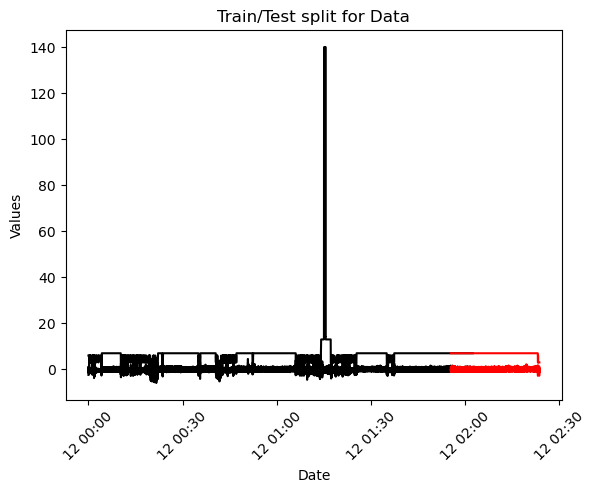

In [40]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Values')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [6]:
# Separate lagged features from the target variable 'label'
X_train = lagged_train.copy()

# Set the same index on both lagged_train and train DataFrames
train.set_index(lagged_train.index, inplace=True)

# Extract the target variable 'label' for the corresponding indices
y_train = train['label']

# Drop rows with NaN values (due to lagging)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

# Display the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (356040, 600)
y_train shape: (356040,)


In [7]:
# Create lag features for the test set
lagged_test = test.copy()
lagged_columns_test = []

for i in range(1, 101):
    for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
        lagged_columns_test.append(lagged_test[col].shift(i))

# Concatenate all lagged columns into a single DataFrame
lagged_test = pd.concat(lagged_columns_test, axis=1)

# Rename the columns with appropriate names
lagged_test.columns = [f'{col}_lag_{i}' for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z'] for i in range(1, 101)]

# Drop rows with NaN values (due to lagging)
lagged_test.dropna(inplace=True)

# Split lagged_test into features (X_test) and target variable (y_test)
X_test = lagged_test
y_test = test.loc[lagged_test.index, 'label']

# Display the shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (83698, 600)
y_test shape: (83698,)


In [9]:
print(lagged_train)

        back_x_lag_1  back_x_lag_2  back_x_lag_3  back_x_lag_4  back_x_lag_5  \
0                NaN           NaN           NaN           NaN           NaN   
1          -2.409951     -0.046434      0.014000     -0.265595     -0.743889   
2          -1.562595      0.171910      0.435377     -0.406350     -0.215105   
3          -1.587608      0.639000     -0.097640     -1.684106     -0.178350   
4          -0.217441     -0.085718     -0.275723     -0.509119      0.830213   
...              ...           ...           ...           ...           ...   
356135     -0.844467     -0.060799     -0.609599     -0.110845     -0.164378   
356136     -0.843116     -0.063000     -0.609474     -0.115921     -0.165751   
356137     -0.844329     -0.052643     -0.608984     -0.107029     -0.164303   
356138     -0.843207     -0.055945     -0.610167     -0.105033     -0.165839   
356139     -0.844268     -0.053147     -0.607677     -0.112039     -0.164099   

        back_x_lag_6  back_x_lag_7  bac

In [39]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=30, random_state=42)

In [ ]:
for i in range(1, 51):
    for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
        lagged_col_name = f"{col}_{i}"  # Constructing the lagged column name
        lagged_test[lagged_col_name] = lagged_train[col].shift(i)  # Creating lagged columns
        lagged_columns.append(lagged_col_name)
# Fill NaN values with 0
lagged_test.fillna(0, inplace=True)

In [48]:
# Predict labels for the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

C:\Users\evage\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\evage\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9986738034361633
Precision: 0.9991442944734172
Recall: 0.9986738034361633
F1 Score: 0.9988941156660142
Confusion Matrix:
 [[    0     0     0     0]
 [   39   506    40     2]
 [    1    29   142     0]
 [    0     0     0 82939]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.95      0.86      0.90       587
           6       0.78      0.83      0.80       172
           7       1.00      1.00      1.00     82939

    accuracy                           1.00     83698
   macro avg       0.68      0.67      0.68     83698
weighted avg       1.00      1.00      1.00     83698



C:\Users\evage\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\evage\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


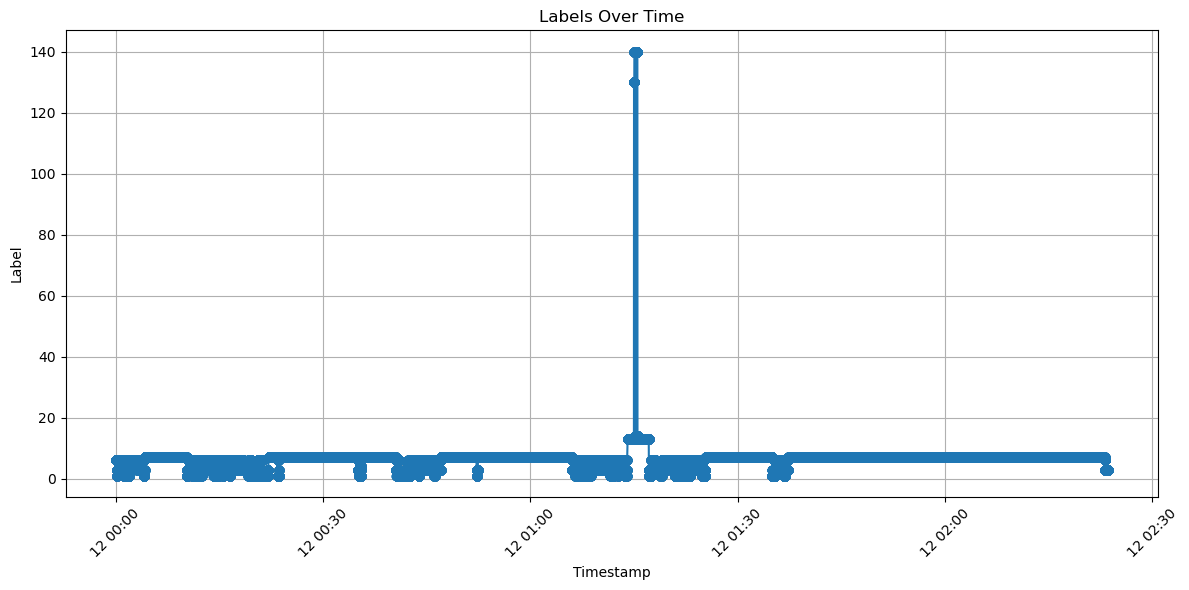

In [55]:
# Plot the labels over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['label'], marker='o', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Labels Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

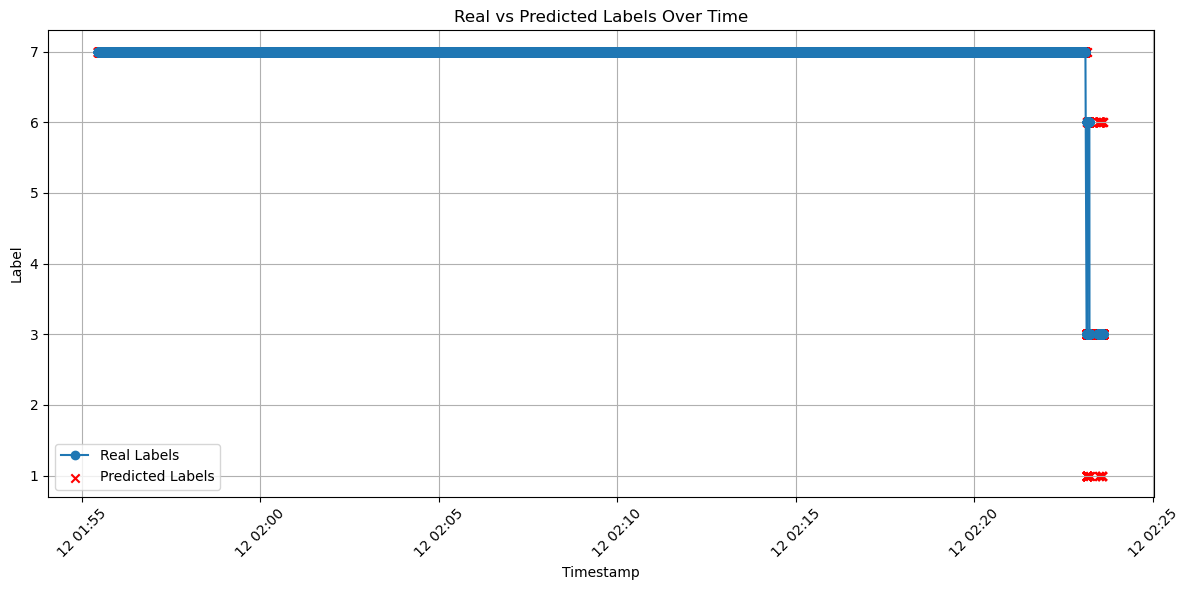

In [57]:
# Filter the DataFrame to include only the timestamps with predictions
df_with_pred = df.loc[df.index.isin(X_test.index)]

# Plot the labels over time
plt.figure(figsize=(12, 6))
plt.plot(df_with_pred.index, df_with_pred['label'], label='Real Labels', marker='o', linestyle='-')

# Plot the predicted labels
plt.scatter(df_with_pred.index, y_pred, label='Predicted Labels', color='red', marker='x')

plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Real vs Predicted Labels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()